# <a id='0'>ESPAÑA y sus FUENTES de ENERGÍA</h1>
![FuentesEnergia](
img_energia.webp)

## *ÍNDICE:* 
---
- [ 1. ANÁLISIS EXPLORATORIO DE DATOS (EDA):](#1)
    - [1.1. Hipótesis](#11)
    - [1.2. Acondicionamiento bases de datos](#12)
    - [1.3. Análisis visual](#13)
        - [1.3.1. Evolución energías en España](#131)
        - [1.3.2. Energía generada vs energía demandada](#132)
        - [1.3.3. Balance eficiencia energética-efectos adversos](#133)
        - [1.3.4. Influencia del clima en la generación de energía](#131)
    - [1.4. Análisis estadístico](#14)
- [2. CONCLUSIONES](#2)
---

### *Contacto:*
___
* Email: ***carla.glezz@gmail.com***
* Linkedin: ***https://www.linkedin.com/in/mariacarlagonzalezgonzalez/***
---
---

 
# **1. Análisis Exploratio de Datos (EDA)**<a id='1'></a>


##  **1.1. Hipótesis**<a id='11'></a>

### **¿Energía a invertir en España?** 🤔

1. **¿Progresión de las distintas fuentes de energía en España en los últimos años?** 
    * Hipótesis: previsiblemente hay un aumento en renovables
    * ¿Energía o energías que más generan? 


2. **¿Autoabastecimiento?**
    * ¿Coinciden la energía que consume España con la que genera?
        + Excedente podría indicar la exportación y un deficit la importación. 
        + Otra posibilidad es falta de datos en alguno de los resultados. 
        (Se está trabajando en el almacenaje de energía pero de momento no es una tecnología en uso)
    * En función de la demanda/consumo anual de energía en España, ¿cuánto faltaría para autoabastecerse?    


3. **¿Eficiencia vs efectos adversos?** (elegiendo 2 de las energías con mayor probabilidad de ser nuestra elección final)
    * ¿Se puede encontrar un equilibrio? ¿Cómo nos afecta?


4. **¿Influencia del clima?**
    * Es previsible que sea afirmativa la respuesta, sobretodo en renovables.
        + Los datos son una muestra, es necesario verificar que es suficiente y representativa de la población. 
    * ¿Se considera significativa esta influencia? 
        + Es posible que halla otros factores más significativos, como pueden ser la potencia instalada, la tecnología empleada,etc.


5. **Análisis económico** *(Punto a estudiar más adelante)*
    * ¿Cuales son las fuentes más baratas?
    * ¿Cuales son las más rentables?
    * ¿Las que más generan son las más rentables económicamente?
    * ¿Se puede hallar, si no lo hubiera, entre eficiencia energética y rentabilidad económica?


    




##  **1.2. Acondicionamiento bases de datos**<a id='12'></a>

In [74]:
# Librery
from utils.utilsEDA import *

In [75]:
# Read all csv 

# NOTA IMPORTANTE: Copiar path hasta la carpeta 'scr' (único cambio para funcionamiento)
preroot='/Users/mcgg/Documents/TheBridge_DataScience_py_local/02_DATA_ANALISIS/EDA_MC/EDA-energia/energy-data/src'

df_spn=pd.read_csv(preroot+'/data/spn_energy_data.csv')
df_wheather_spn=pd.read_csv(preroot+'/data/spn_weather_features.csv')

### *Extracción inicial info. de los CSVs*

In [76]:
print('* Datos energía España: *')
df_spn.info()

* Datos energía España: *
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35045 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil coal-derived gas           35046 non-null  float64
 4   generation fossil gas                        35046 non-null  float64
 5   generation fossil hard coal                  35046 non-null  float64
 6   generation fossil oil                        35045 non-null  float64
 7   generation fossil oil shale                  35046 non-null  float64
 8   generation fossil peat                       35046 non-null  float64
 9   generation geothermal                        3

In [77]:
print('* Datos clima España: *')
df_wheather_spn.info()

* Datos clima España: *
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178396 entries, 0 to 178395
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dt_iso               178396 non-null  object 
 1   city_name            178396 non-null  object 
 2   temp                 178396 non-null  float64
 3   temp_min             178396 non-null  float64
 4   temp_max             178396 non-null  float64
 5   pressure             178396 non-null  int64  
 6   humidity             178396 non-null  int64  
 7   wind_speed           178396 non-null  int64  
 8   wind_deg             178396 non-null  int64  
 9   rain_1h              178396 non-null  float64
 10  rain_3h              178396 non-null  float64
 11  snow_3h              178396 non-null  float64
 12  clouds_all           178396 non-null  int64  
 13  weather_id           178396 non-null  int64  
 14  weather_main         178396 non-null  object

### *Tratamiento bases de datos:*


#### csv generación energía España

```df_spn```: DataFrame que contiene los datos de energía en españa recogidos desde 1 enero 2015 hasta 31 diciembre 2018

|column	|description	|
|-------|---------------|
|time|fecha y hora|
|generation biomass|energía generada, en MWh, provieniente de biomasa (fuente renovable)|
|generation fossil brown coal/lignite|energía generada, en MWh, provieniente de derivados fósiles (fuente no renovable)|
|generation fossil bcoal-derived gas|energía generada, en MWh, provieniente de derivados fósiles (fuente no renovable)|
|generation fossil gas|energía generada, en MWh, provieniente de derivados fósiles (fuente no renovable)|
|generation fossil hard coal|energía generada, en MWh, provieniente de derivados fósiles (fuente no renovable)|
|generation fossil oil|energía generada, en MWh, provieniente de derivados fósiles (fuente no renovable)|
|generation fossil oil shale|energía generada, en MWh, provieniente de derivados fósiles (fuente no renovable)|
|generation fossil peat|energía generada, en MWh, provieniente de derivados fósiles (fuente no renovable)|
|generation geothermal|energía geotérmica generada, en MWh (fuente renovable)|
|generation hydro pumped storage aggregated|energía hidroeléctrica generada, en MWh (fuente renovable)|
|generation hydro pumped storage consumption|energía hidroeléctrica generada, en MWh (fuente renovable)|
|generation hydro run-of-river and poundage|energía hidroeléctrica generada, en MWh (fuente renovable)|
|generation hydro water reservoir|energía hidroeléctrica generada, en MWh (fuente renovable)|
|generation marine|energía marina generada, en MWh (fuente renovable)|
|generation nuclear|energía nuclear generada, en MWh (fuente no renovable)|
|generation other|energía generada no renovable que engloba las fuentes restantes, en MWh (fuente no renovable)|
|generation other renewable|energía generada renovable que engloba las fuentes restantes, en MWh (fuente renovable)|
|generation solar|energía generada, en MWh, provieniente del sol (fuente renovable)|
|generation waste|energía generada, en MWh, provieniente de residuos/cogeneración (fuente no renovable)|
|generation wind offshore|energía generada, en MWh, provieniente del viento no situado en tierra (fuente renovable)|
|generation wind onshore|energía generada, en MWh, provieniente del viento situado en tierra (fuente renovable)|
|forecast solar day ahead|--|
|forecast wind offshore eday ahead|--|
|forecast wind onshore day ahead|--|
|total load forecast|--|
|total load actual|--|
|price day ahead|--|
|price actual|--|


In [78]:
print('Número de columnas: ',len(df_spn.columns))
df_spn.columns

Número de columnas:  29


Index(['time', 'generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil coal-derived gas', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation fossil oil shale', 'generation fossil peat',
       'generation geothermal', 'generation hydro pumped storage aggregated',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation marine',
       'generation nuclear', 'generation other', 'generation other renewable',
       'generation solar', 'generation waste', 'generation wind offshore',
       'generation wind onshore', 'forecast solar day ahead',
       'forecast wind offshore eday ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual'],
      dtype='object')

In [79]:
df_spn.tail()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
35059,2018-12-31 19:00:00+01:00,297.0,0.0,0.0,7634.0,2628.0,178.0,0.0,0.0,0.0,...,277.0,0.0,3113.0,96.0,NaN,3253.0,30619.0,30653.0,68.85,77.02
35060,2018-12-31 20:00:00+01:00,296.0,0.0,0.0,7241.0,2566.0,174.0,0.0,0.0,0.0,...,280.0,0.0,3288.0,51.0,NaN,3353.0,29932.0,29735.0,68.40,76.16
35061,2018-12-31 21:00:00+01:00,292.0,0.0,0.0,7025.0,2422.0,168.0,0.0,0.0,0.0,...,286.0,0.0,3503.0,36.0,NaN,3404.0,27903.0,28071.0,66.88,74.30
35062,2018-12-31 22:00:00+01:00,293.0,0.0,0.0,6562.0,2293.0,163.0,0.0,0.0,0.0,...,287.0,0.0,3586.0,29.0,NaN,3273.0,25450.0,25801.0,63.93,69.89
35063,2018-12-31 23:00:00+01:00,290.0,0.0,0.0,6926.0,2166.0,163.0,0.0,0.0,0.0,...,287.0,0.0,3651.0,26.0,NaN,3117.0,24424.0,24455.0,64.27,69.88


In [80]:
# Se reemplaza 'time' quitándole el intervalo
df_spn['time']=df_spn['time'].replace({'\+01:00|\+02:00|\+03:00':''},regex=True)

# Se transforma en formato datetime la columna 'time' 
df_spn['time_dt']=pd.to_datetime(df_spn['time'], infer_datetime_format=True)
df_spn.columns

Index(['time', 'generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil coal-derived gas', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation fossil oil shale', 'generation fossil peat',
       'generation geothermal', 'generation hydro pumped storage aggregated',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation marine',
       'generation nuclear', 'generation other', 'generation other renewable',
       'generation solar', 'generation waste', 'generation wind offshore',
       'generation wind onshore', 'forecast solar day ahead',
       'forecast wind offshore eday ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual', 'time_dt'],
      dtype='object')

In [81]:
# Se eliminan las filas y columnas que contengan NaN en todos sus elementos 
comp_colna_filna(df_spn,['time'])
df_spn=del_colna_filna(df_spn,['time'])
print('Nº de columnas actuales:',len(df_spn.columns))

Se mantienen las mismas filas: True y columnas: False
Número fil y col antes (35064, 30) Número fil y col después (35064, 28)
Nº de columnas actuales: 28


In [82]:
# Se comprueba los NaN restantes de cada fila 
df_spn.isna().sum()

time                                            0
generation biomass                             19
generation fossil brown coal/lignite           18
generation fossil coal-derived gas             18
generation fossil gas                          18
generation fossil hard coal                    18
generation fossil oil                          19
generation fossil oil shale                    18
generation fossil peat                         18
generation geothermal                          18
generation hydro pumped storage consumption    19
generation hydro run-of-river and poundage     19
generation hydro water reservoir               18
generation marine                              19
generation nuclear                             17
generation other                               18
generation other renewable                     18
generation solar                               18
generation waste                               19
generation wind offshore                       18


In [83]:
# Se van rellenando columnas hacia delante, es decir, cogiendo el valor anterior 
df_spn.fillna(method='ffill',inplace=True) 
# Se obtiene así un dataset libre de NaN
df_spn.isna().sum()

time                                           0
generation biomass                             0
generation fossil brown coal/lignite           0
generation fossil coal-derived gas             0
generation fossil gas                          0
generation fossil hard coal                    0
generation fossil oil                          0
generation fossil oil shale                    0
generation fossil peat                         0
generation geothermal                          0
generation hydro pumped storage consumption    0
generation hydro run-of-river and poundage     0
generation hydro water reservoir               0
generation marine                              0
generation nuclear                             0
generation other                               0
generation other renewable                     0
generation solar                               0
generation waste                               0
generation wind offshore                       0
generation wind onsh

In [84]:
# Se eligen las columnas con las que se va a trabajar
df_spn=df_spn.loc[:,df_spn.columns.str.startswith('generation')+df_spn.columns.str.startswith('time')]
# Se eliminan las columnas que todos sus datos sean 0, dado que indica el no registro de esa variable 
[df_spn.drop(columns=col,inplace=True) for col in df_spn.columns if (df_spn[col]==0).sum()==len(df_spn)]
df_spn.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,time_dt
0,2015-01-01 00:00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,2015-01-01 00:00:00
1,2015-01-01 01:00:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,195.0,5890.0,2015-01-01 01:00:00
2,2015-01-01 02:00:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,73.0,50.0,196.0,5461.0,2015-01-01 02:00:00
3,2015-01-01 03:00:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,75.0,50.0,191.0,5238.0,2015-01-01 03:00:00
4,2015-01-01 04:00:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,74.0,42.0,189.0,4935.0,2015-01-01 04:00:00


In [85]:
# Se comprueban los outliers:

print(f'Filas totales: {len(df_spn)}\n')
print('Número de outliers por columna:\n')
for col in df_spn.loc[:,df_spn.columns.str.startswith('generation')]:
    print(col,':',outlier(df_spn[col]))

Filas totales: 35064

Número de outliers por columna:

generation biomass : 87
generation fossil brown coal/lignite : 0
generation fossil gas : 2185
generation fossil hard coal : 0
generation fossil oil : 246
generation hydro pumped storage consumption : 3762
generation hydro run-of-river and poundage : 0
generation hydro water reservoir : 343
generation nuclear : 79
generation other : 1267
generation other renewable : 5
generation solar : 0
generation waste : 328
generation wind onshore : 377


---
*Agrupaciones*: 

---

In [86]:
# Agrupaciones según origen:
fosil=['generation fossil brown coal/lignite',
       'generation fossil gas', 'generation fossil hard coal',
       'generation fossil oil']

hydro=['generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir']
       
# División entre renovables y no renovables:
rnw_0=['generation biomass', 'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir',
       'generation other renewable', 'generation solar',
       'generation wind onshore']
       
nrnw_0=['generation fossil brown coal/lignite',
       'generation fossil gas', 'generation fossil hard coal',
       'generation fossil oil','generation nuclear',
       'generation other','generation waste']

rnw=['generation biomass', 'generation hydro',
       'generation other renewable', 'generation solar',
       'generation wind onshore']
       
nrnw=['generation fossil','generation nuclear',
       'generation other','generation waste']

# Selección de columnas:
columns_0=['generation wind onshore','generation solar','generation fossil gas','generation fossil hard coal','generation nuclear']
# Elegidas para análisis posterior (las hydro tienen limitación geográfica, por eso no se han incluido)
columns=['generation wind onshore','generation solar','generation fossil','generation nuclear'] 

In [87]:
df_spn['generation fossil'] = df_spn[fosil].sum(axis=1)
df_spn['generation hydro'] = df_spn[hydro].sum(axis=1)
df_spn.drop(columns=fosil+hydro,inplace=True)
df_spn.head()

,time,generation biomass,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,time_dt,generation fossil,generation hydro
0,2015-01-01 00:00:00,447.0,7096.0,43.0,73.0,49.0,196.0,6378.0,2015-01-01 00:00:00,10156.0,3813.0
1,2015-01-01 01:00:00,449.0,7096.0,43.0,71.0,50.0,195.0,5890.0,2015-01-01 01:00:00,10437.0,3587.0
2,2015-01-01 02:00:00,448.0,7099.0,43.0,73.0,50.0,196.0,5461.0,2015-01-01 02:00:00,9918.0,3508.0
3,2015-01-01 03:00:00,438.0,7098.0,43.0,75.0,50.0,191.0,5238.0,2015-01-01 03:00:00,8859.0,3231.0
4,2015-01-01 04:00:00,428.0,7097.0,43.0,74.0,42.0,189.0,4935.0,2015-01-01 04:00:00,8313.0,3499.0


In [88]:
# Agrupaciones por hora, día, mes y año: 
df_spn_day=df_spn.copy()
df_spn_day['day']=df_spn_day['time'].replace({'| \d+\d+:\d+\d+:\d+\d+|':''},regex=True)

df_spn_year=df_spn_day.copy()

# Se crea una columna tipo datatime llamada 'day_dt' equivale al str de 'time' 
df_spn_year['day_dt']=pd.to_datetime(df_spn_day['day'], infer_datetime_format=True)

df_spn_month=df_spn_year.groupby(df_spn_year['day_dt'].dt.month).mean()
df_spn_year=df_spn_year.groupby(df_spn_year['day_dt'].dt.year).mean()

# Se divide en años: 
df_spn_day_2015=df_spn_day.loc[df_spn_day['day'].str.startswith('2015'),:]
df_spn_day_2016=df_spn_day.loc[df_spn_day['day'].str.startswith('2016'),:]
df_spn_day_2017=df_spn_day.loc[df_spn_day['day'].str.startswith('2017'),:]
df_spn_day_2018=df_spn_day.loc[df_spn_day['day'].str.startswith('2018'),:]

# Se agrupa por fecha: se realiza la media de todas las horas del día.
df_spn_day=df_spn_day.groupby('day').mean()

# Se agrupa por los meses de cada año:
df_spn_day_i=[df_spn_day_2015,df_spn_day_2016,df_spn_day_2017,df_spn_day_2018]


for i in df_spn_day_i:
    i['month_dt']=pd.to_datetime(i['day'], infer_datetime_format=True)

df_spn_month_2015=df_spn_day_2015.groupby(df_spn_day_2015['month_dt'].dt.month).mean()
df_spn_month_2016=df_spn_day_2016.groupby(df_spn_day_2016['month_dt'].dt.month).mean()
df_spn_month_2017=df_spn_day_2017.groupby(df_spn_day_2017['month_dt'].dt.month).mean()
df_spn_month_2018=df_spn_day_2018.groupby(df_spn_day_2018['month_dt'].dt.month).mean()

In [89]:
# Reordenar -No renovables y después renovables-

df_spn_day['month']= pd.to_datetime(df_spn_day.index).month
df_spn_day['year']= pd.to_datetime(df_spn_day.index).year
df_spn_day_=df_spn_day[['month','year']+nrnw+rnw]
df_spn_day_.head()


,month,year,generation fossil,generation nuclear,generation other,generation waste,generation biomass,generation hydro,generation other renewable,generation solar,generation wind onshore
day,,,,,,,,,,,
2015-01-01,1,2015,8920.916667,7097.000000,42.250000,202.166667,428.500000,4285.166667,73.958333,1143.458333,3708.416667
2015-01-02,1,2015,4976.291667,7105.833333,44.250000,185.250000,385.291667,6552.166667,61.375000,1252.208333,11225.375000
2015-01-03,1,2015,5015.125000,7095.375000,78.041667,203.958333,440.500000,6682.625000,66.583333,1119.625000,9167.416667
2015-01-04,1,2015,6069.958333,7083.625000,83.708333,159.291667,397.125000,5326.583333,57.458333,2402.500000,8065.666667
2015-01-05,1,2015,7360.833333,3910.375000,39.166667,152.583333,364.500000,4770.416667,73.666667,1631.541667,7801.833333


#### csv clima España

```df_wheather_spn```: DataFrame que contiene los datos del clima en españa recogidos desde 1 enero 2015 hasta 31 diciembre 2018

|column	|description	|
|-------|---------------|
|dt_iso||
|city_name||
|temp||
|temp_min||
|temp_max||
|pressure||
|humidity||
|wind_speed||
|wind_deg||
|rain_1h||
|rain_3h||
|snow_3h||
|clouds_all||
|weather_id||
|weather_main||
|weather_description||
|weather_icon||


In [90]:
df_wheather_spn.city_name.unique()

array(['Valencia', 'Madrid', 'Bilbao', ' Barcelona', 'Seville'],
      dtype=object)

In [91]:
df_wheather_spn.columns

Index(['dt_iso', 'city_name', 'temp', 'temp_min', 'temp_max', 'pressure',
       'humidity', 'wind_speed', 'wind_deg', 'rain_1h', 'rain_3h', 'snow_3h',
       'clouds_all', 'weather_id', 'weather_main', 'weather_description',
       'weather_icon'],
      dtype='object')

In [92]:

[df_wheather_spn[col].unique() for col in ['clouds_all', 'weather_id', 'weather_main', 'weather_description',
       'weather_icon']]

[array([  0,   8,  12,   4,  24,  44,  64,  82,  92,  88,  48,  68,  80,
         27,  50,  32,  20,  26,  46,   6,  36,  22,  45,  21,  60,  52,
         76,  56,  91,  90,  89,  65,  42,  70,  53,  34,  28,  16,  14,
          5,   2,  38,  10,  18,  86,  78,  54,  29,  72,  84,  74,  15,
         62,  58,  69,  73,  40,  51,  75,  30,  49,  37,  17,  57,  13,
         66,  25,  81,  77,  33,  61,   9,  41,  35,  47,  83,  43,  55,
         59,  71,  87,  67,  79, 100,   7,  19,  39,  23,  95,  96,  85,
          3,  94,  97,  11,  63,  93]),
 array([800, 801, 802, 803, 804, 500, 501, 502, 701, 522, 521, 503, 202,
        200, 201, 211, 520, 300, 741, 301, 711, 302, 721, 310, 600, 616,
        615, 601, 210, 602, 611, 311, 612, 620, 531, 731, 761, 771]),
 array(['clear', 'clouds', 'rain', 'mist', 'thunderstorm', 'drizzle',
        'fog', 'smoke', 'haze', 'snow', 'dust', 'squall'], dtype=object),
 array(['sky is clear', 'few clouds', 'scattered clouds', 'broken clouds',
        'overc

In [93]:
df_wheather_spn.isna().sum()

dt_iso                 0
city_name              0
temp                   0
temp_min               0
temp_max               0
pressure               0
humidity               0
wind_speed             0
wind_deg               0
rain_1h                0
rain_3h                0
snow_3h                0
clouds_all             0
weather_id             0
weather_main           0
weather_description    0
weather_icon           0
dtype: int64

---
Agrupaciones:

---

##  **1.3. Análisis visual**<a id='13'></a>

In [94]:
# Configuraciones gráficas:
sns.set(rc={'figure.figsize':(15, 10)})
plt.style.use('ggplot')
colors_0=['burlywood',
'tan',
'gray',
'darkgray',
'lightcoral',
'cadetblue',
'powderblue',
'slategray',
'lightgray',
'seagreen',
'khaki',
'lightseagreen',
'lemonchiffon',
'mediumaquamarine']
colors=['darkgray',
'lightcoral',
'lightgray',
'tan',
'slategray',
'cadetblue',
'lightseagreen',
'lemonchiffon',
'mediumaquamarine']
colorsrwn_0=['burlywood','cadetblue','powderblue',
'slategray','seagreen',
'khaki','mediumaquamarine']
colorsnrwn_0=['tan','gray','darkgray','lemonchiffon','lightcoral','lightgray','grey',
'brown']
colorsrwn=['slategray',
'cadetblue',
'lightseagreen',
'lemonchiffon',
'mediumaquamarine']
colorsnrwn=['darkgray',
'lightcoral',
'lightgray',
'tan']

### *1.3.1. Evolución de las energías en España:* <a id='131'></a>

<AxesSubplot:>

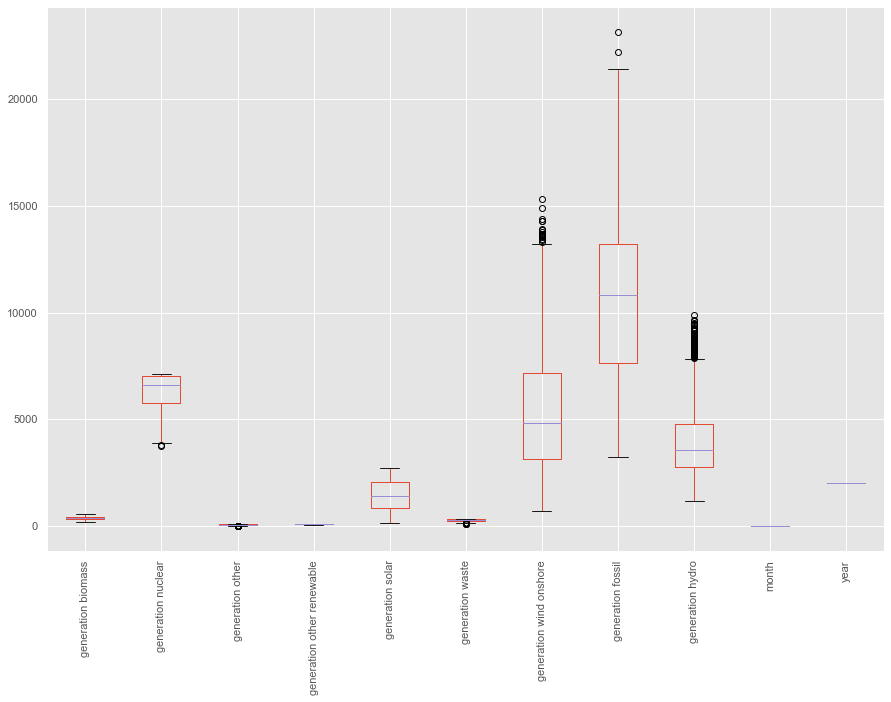

In [95]:
df_spn_day.boxplot(rot='90')

In [96]:
# Se comprueban nuevamente los outliers tras agrupar:

print(f'Filas totales: {len(df_spn_day)}\n')
print('Número de outliers por columna:\n')
for col in df_spn_day.loc[:,df_spn_day.columns.str.startswith('generation')]:
    print(col,':',outlier(df_spn_day[col]))

Filas totales: 1461

Número de outliers por columna:

generation biomass : 0
generation nuclear : 2
generation other : 55
generation other renewable : 0
generation solar : 0
generation waste : 27
generation wind onshore : 19
generation fossil : 2
generation hydro : 90


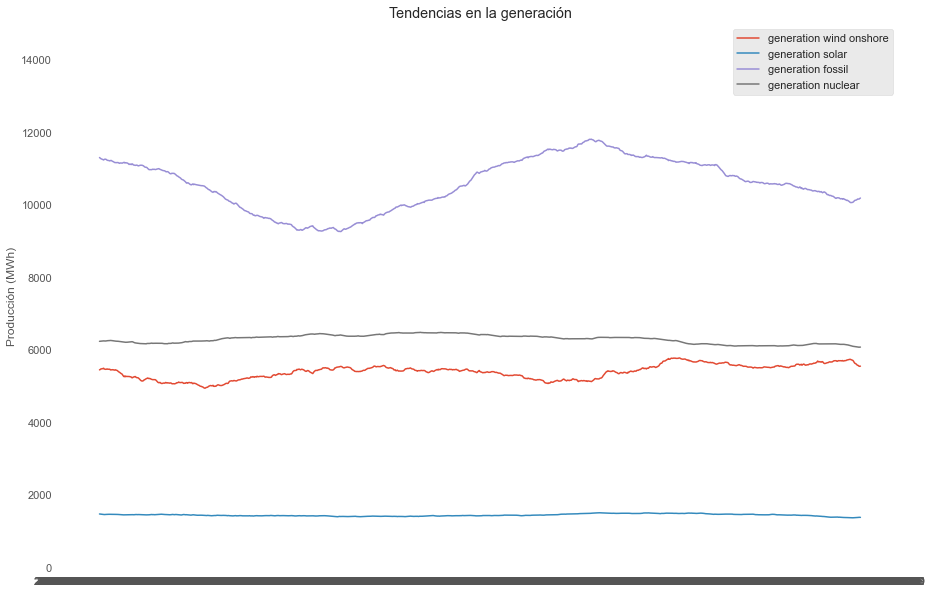

In [97]:

grafica_tendencia(df_spn_day[nrnw].join(df_spn_day[rnw]),columns);


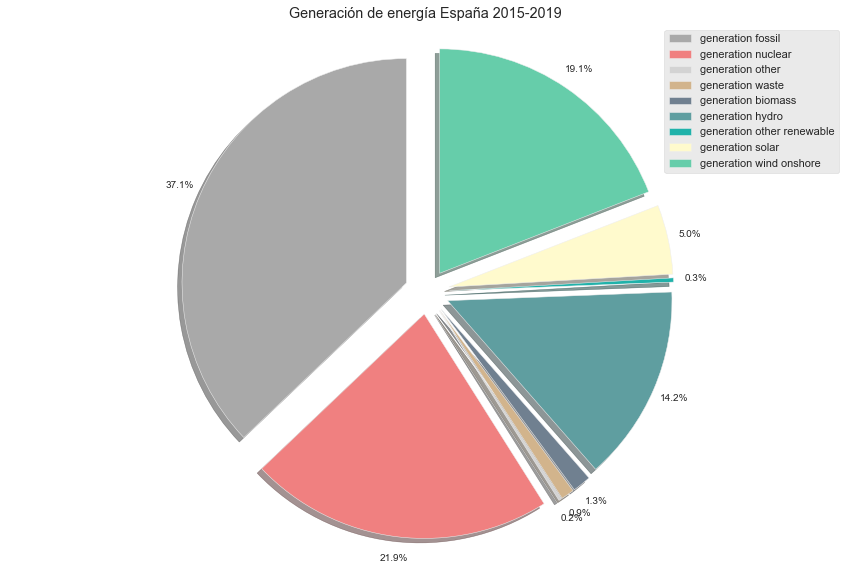

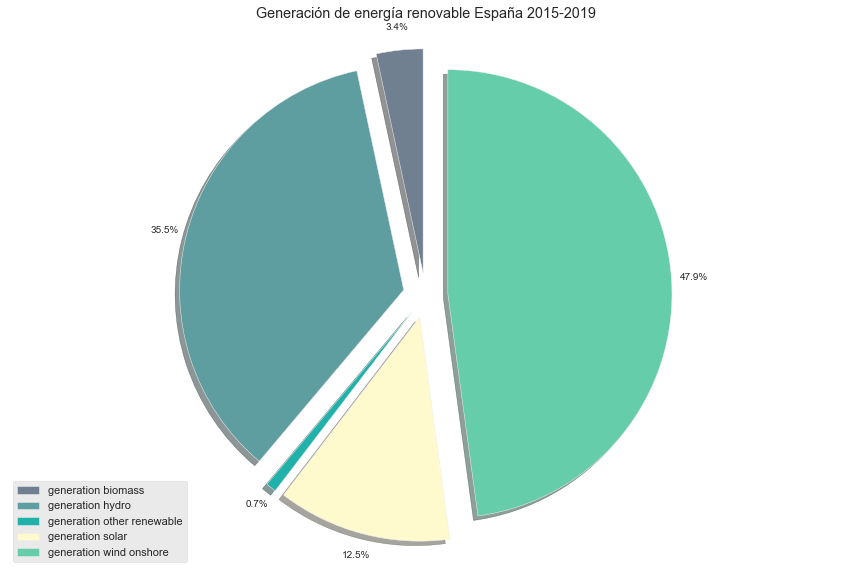

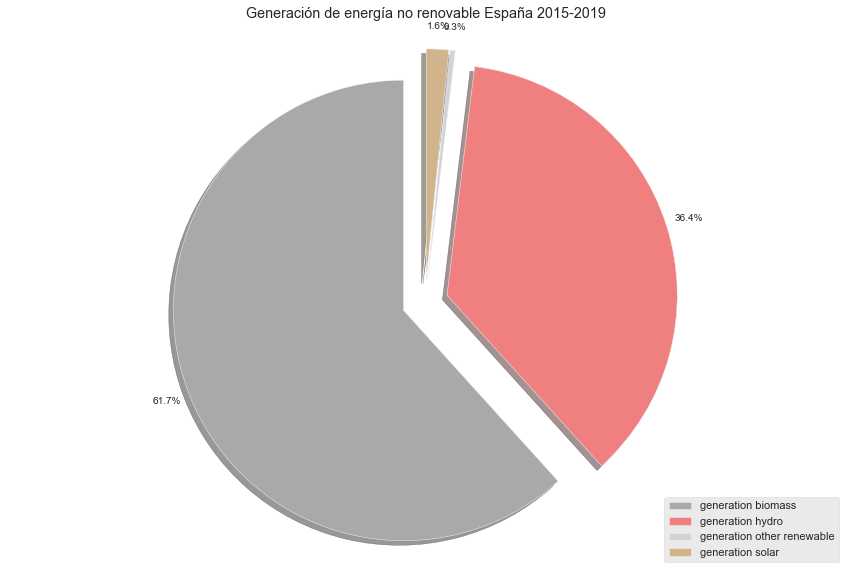

In [98]:
grafica_pie(df_spn_day[nrnw].join(df_spn_day[rnw]),df_spn_day_.columns[df_spn_day_.columns.str.startswith('generation')],color=colors,title='Generación de energía España 2015-2019');
grafica_pie(df_spn_day[rnw],rnw,color=colorsrwn,title='Generación de energía renovable España 2015-2019');
grafica_pie(df_spn_day[nrnw],rnw,color=colorsnrwn,title='Generación de energía no renovable España 2015-2019');

<AxesSubplot:xlabel='day_dt'>

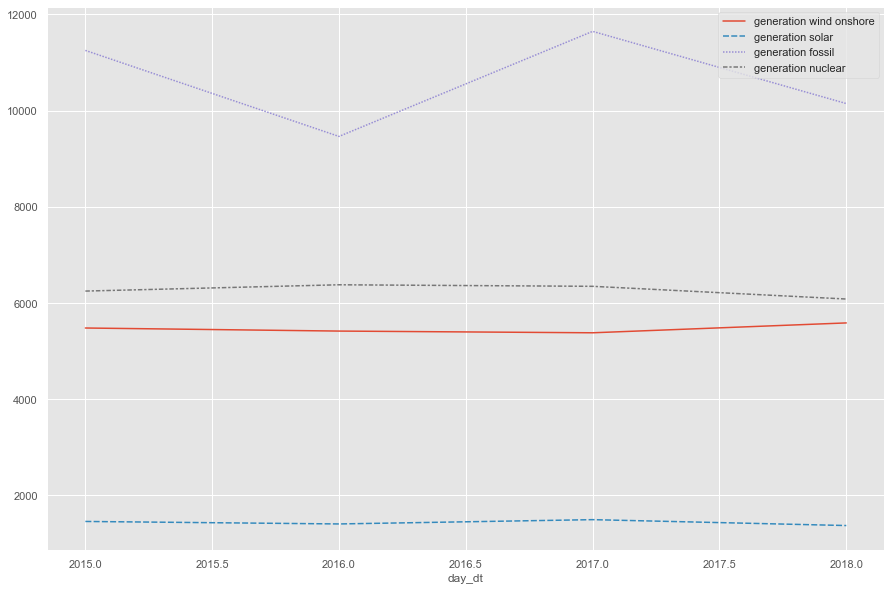

In [99]:
sns.lineplot(data=df_spn_year[columns])

<AxesSubplot:xlabel='month_dt'>

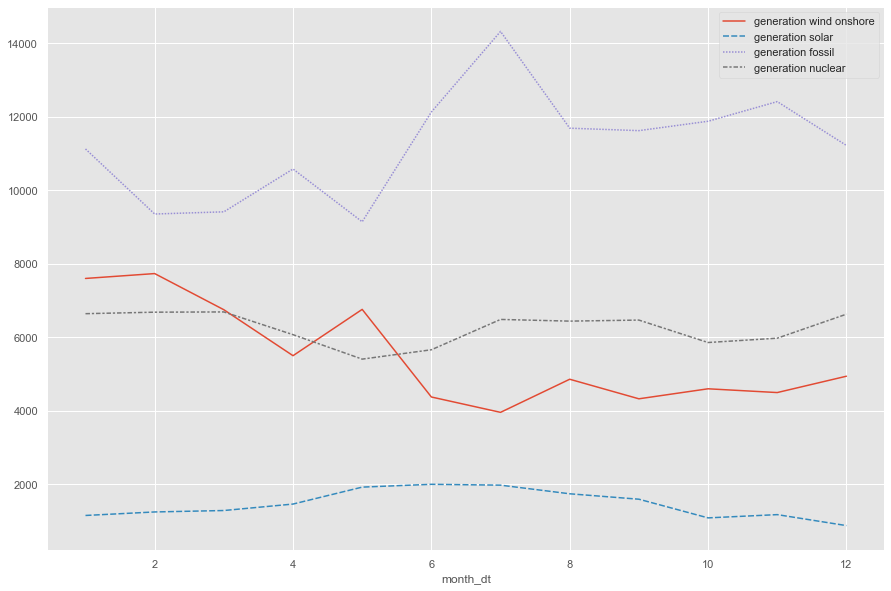

In [100]:
sns.lineplot(data=df_spn_month_2015[columns])

<AxesSubplot:xlabel='month_dt'>

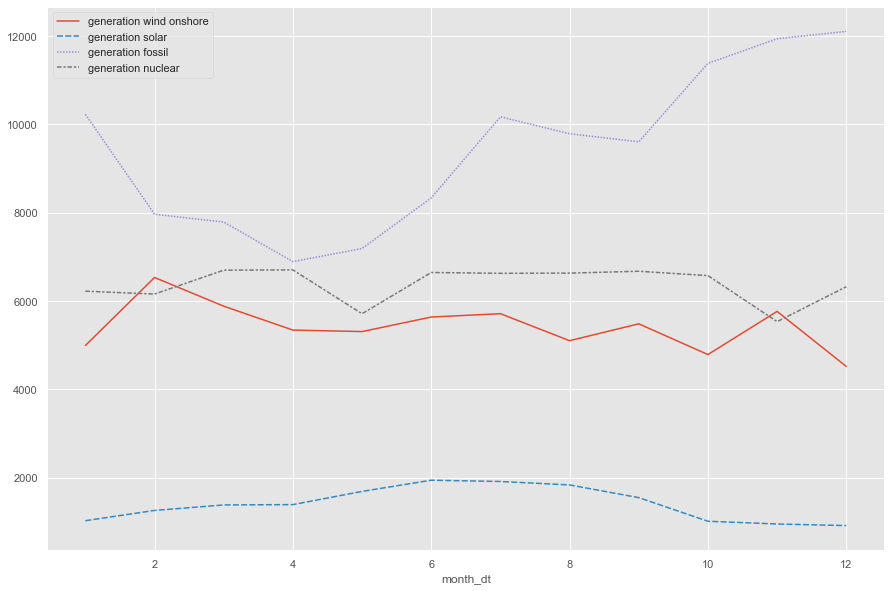

In [101]:
sns.lineplot(data=df_spn_month_2016[columns])

<AxesSubplot:xlabel='month_dt'>

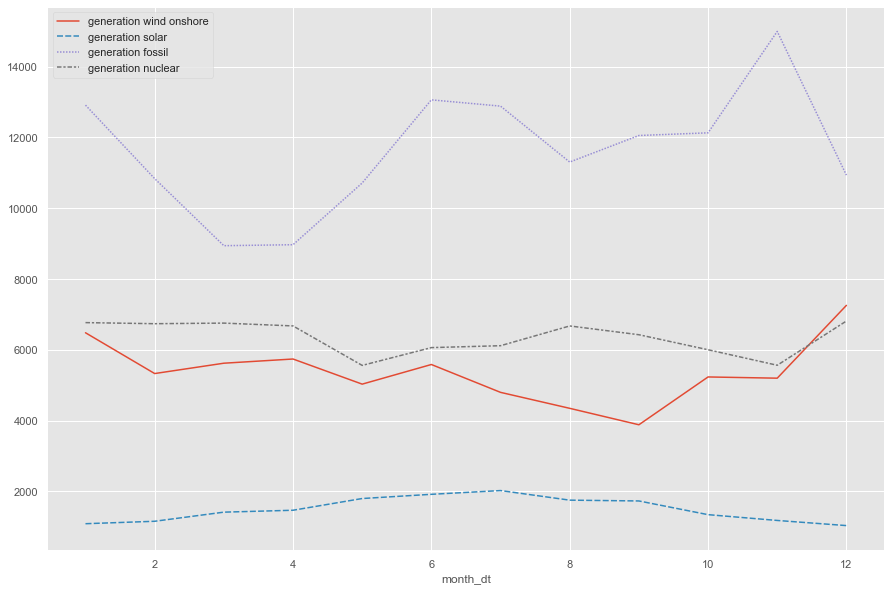

In [102]:
sns.lineplot(data=df_spn_month_2017[columns])

<AxesSubplot:xlabel='month_dt'>

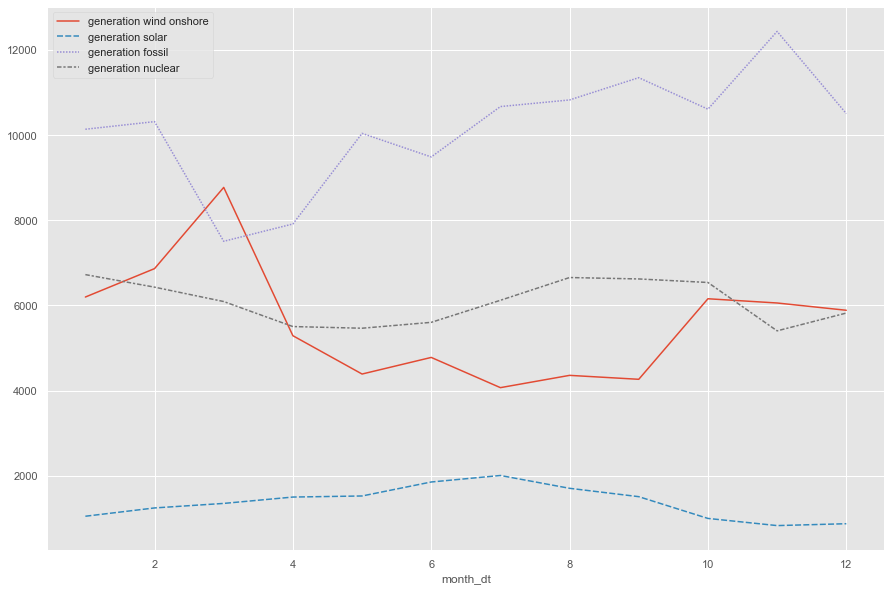

In [103]:
sns.lineplot(data=df_spn_month_2018[columns])

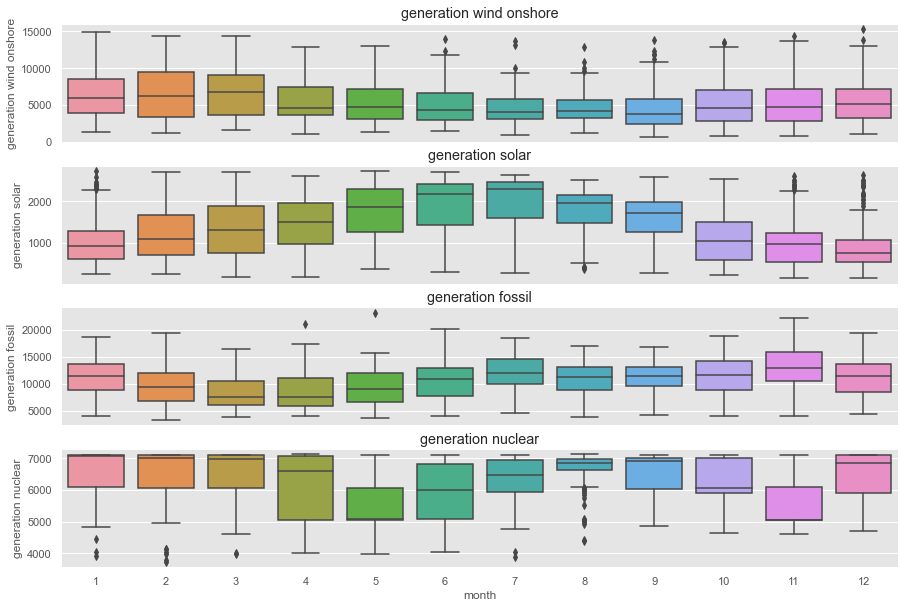

In [104]:
grafica_estacionalidad(df_spn_day_,columns=columns);

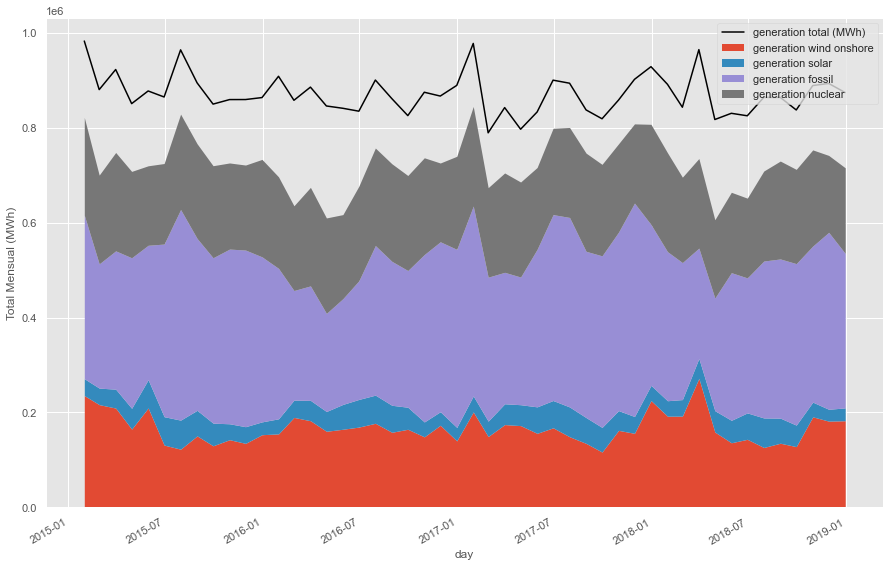

In [105]:
grafica_acumulada(df_spn_day_,columns=columns);

***OBSERVACIONES:***

---
~~~
Mayor fuente generadora de energía entre el 2015 al 2019: energías fósiles. Desglosando algo más: 
    * Renovables: la de mayor generación en España es la eólica, seguida de la hidroeléctrica y posteriormente la solar.
    * No renovables: la mayor generación viene del conjunto de las energías fósiles, que si bien en su conjunto es la mayor generadora en España, 
    si la dividimos en sus grupos encontramos algunas variaciones. La nuclear estaría en una posición cercana a la fósil mayor generada, siendo esta de las energías más constantes. 

Estacionalidad: se destaca, como era previsible, que en la solar y la eólica es más marcada la estacionalidad. Sin embargo, en las fósiles también se pueden ver variaciones en función del mes del año. 

Tendencia: se ha examinado la tendencia. Observando, tanto en el intervalo como en cada periodo anual, se encuentran despuntes puntuales, sin embargo no hay una clara tendencia creciente o decreciente. Para hacer una afirmación de esta índole, visualmente, es necesario ampliar el intervalo temporal y/o añadir algunas variables. 
~~~
---

### *1.3.2. Energía generada vs energía demandada:* <a id='132'></a>

In [106]:
df_spn_year

,generation biomass,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,generation fossil,generation hydro
day_dt,,,,,,,,,
2015,491.302626,6247.294749,77.920091,69.226256,1457.750799,223.088356,5479.470434,11250.723858,3940.224201
2016,365.494194,6378.180783,60.281421,80.638661,1405.762637,258.224271,5415.737363,9462.458106,4971.028689
2017,340.474658,6346.135388,49.267466,94.792694,1495.184361,297.659589,5380.132991,11646.865525,2790.145548
2018,336.909132,6082.082306,53.432534,97.893379,1372.596119,298.735274,5585.256849,10145.897489,4509.152968


In [108]:
anios=[2015,2016,2017,2018]
lista_elem=[]
for anio in anios:
    res=api_ree('demanda','evolucion',start_date=str(anio)+'-01-01T00:00',end_date=str(anio)+'-12-31T23:59',time_trunc='day')
    res=extract_info(res,{'included':{0:['attributes']}})
    
    for elem in range(0,len(res[0]['values'])):
        lista_elem.append(extract_info(res[0],{'values':{elem:['datetime','value']}}))


In [109]:
lista_tun=[[str(lista_elem[i][0]),str(lista_elem[i][1])] for i in range(0,len(lista_elem))]


In [110]:
for i in range(0,len(lista_tun)):
    save_file('demand.txt','time;total_demand',lista_tun[i])

In [114]:
demand_spn=pd.read_csv('data/demand.txt',sep=';')

In [115]:
len(demand_spn)

1460

In [116]:

# Se reemplaza 'time' quitándole el intervalo
demand_spn['time']=demand_spn['time'].replace({'\+01:00|\+02:00|\+03:00':''},regex=True)

# Se transforma en formato datetime la columna 'time' 
demand_spn['time']=pd.to_datetime(demand_spn['time'], infer_datetime_format=True)
demand_spn.head()

,time,total_demand
0,2015-01-02,715038.679
1,2015-01-03,698648.512
2,2015-01-04,663533.254
3,2015-01-05,714784.323
4,2015-01-06,640502.590


In [47]:
df_spn_day_

,month,year,generation fossil,generation nuclear,generation other,generation waste,generation biomass,generation hydro,generation other renewable,generation solar,generation wind onshore
day,,,,,,,,,,,
2015-01-01,1,2015,8920.916667,7097.000000,42.250000,202.166667,428.500000,4285.166667,73.958333,1143.458333,3708.416667
2015-01-02,1,2015,4976.291667,7105.833333,44.250000,185.250000,385.291667,6552.166667,61.375000,1252.208333,11225.375000
2015-01-03,1,2015,5015.125000,7095.375000,78.041667,203.958333,440.500000,6682.625000,66.583333,1119.625000,9167.416667
2015-01-04,1,2015,6069.958333,7083.625000,83.708333,159.291667,397.125000,5326.583333,57.458333,2402.500000,8065.666667
2015-01-05,1,2015,7360.833333,3910.375000,39.166667,152.583333,364.500000,4770.416667,73.666667,1631.541667,7801.833333
...,...,...,...,...,...,...,...,...,...,...,...
2018-12-27,12,2018,13639.125000,6065.916667,61.791667,297.250000,304.333333,5126.041667,91.916667,673.416667,1118.750000
2018-12-28,12,2018,11768.041667,6072.583333,59.875000,306.666667,316.458333,3758.833333,97.458333,551.000000,3886.000000
2018-12-29,12,2018,6975.541667,6072.375000,60.166667,310.750000,289.625000,3546.500000,100.416667,755.250000,7172.166667


<AxesSubplot:xlabel='time'>

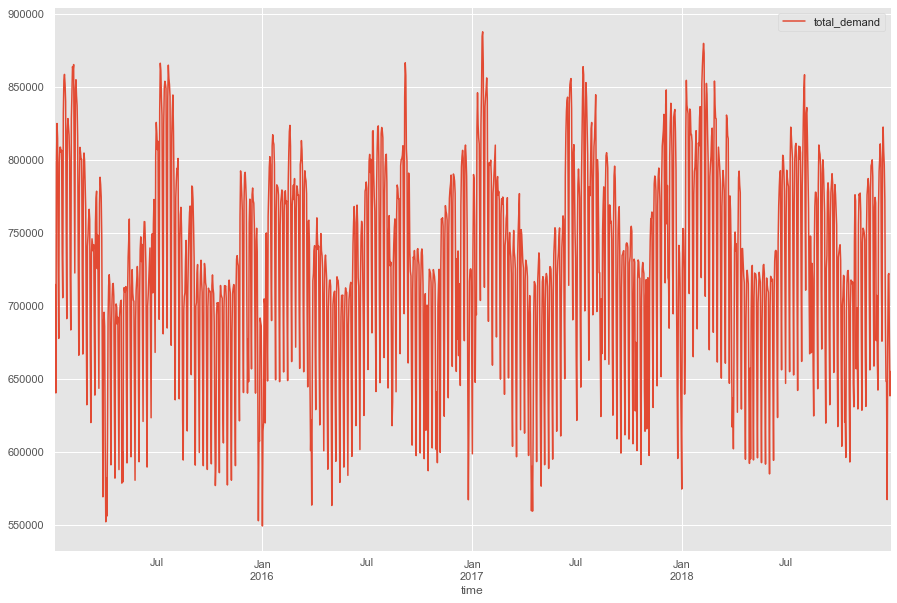

In [120]:
demand_spn.groupby('time').mean().plot()

In [61]:
df_spn_day_2015.drop('time',axis=1,inplace=True)

In [62]:
df_spn_day_2015.rename({'day':'time'},axis=1,inplace=True)

In [66]:
df_spn_day_2015=df_spn_day_2015.groupby('time').mean()

In [71]:
len(demand_spn.values)
len(df_spn_day_2015['generation biomass'])

365

In [55]:
df_spn_day_2015.dtypes

time                                  object
generation biomass                   float64
generation nuclear                   float64
generation other                     float64
generation other renewable           float64
generation solar                     float64
generation waste                     float64
generation wind onshore              float64
time_dt                       datetime64[ns]
generation fossil                    float64
generation hydro                     float64
day                                   object
month_dt                      datetime64[ns]
dtype: object

In [69]:
df_spn_day_2015.join(demand_spn)

,generation biomass,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,generation fossil,generation hydro,time,value
time,,,,,,,,,,,
2015-01-01,428.500000,7097.000000,42.250000,73.958333,1143.458333,202.166667,3708.416667,8920.916667,4285.166667,NaT,NaN
2015-01-02,385.291667,7105.833333,44.250000,61.375000,1252.208333,185.250000,11225.375000,4976.291667,6552.166667,NaT,NaN
2015-01-03,440.500000,7095.375000,78.041667,66.583333,1119.625000,203.958333,9167.416667,5015.125000,6682.625000,NaT,NaN
2015-01-04,397.125000,7083.625000,83.708333,57.458333,2402.500000,159.291667,8065.666667,6069.958333,5326.583333,NaT,NaN
2015-01-05,364.500000,3910.375000,39.166667,73.666667,1631.541667,152.583333,7801.833333,7360.833333,4770.416667,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2015-12-27,420.791667,7100.250000,40.583333,65.833333,583.500000,180.791667,8813.708333,5159.583333,3483.166667,NaT,NaN
2015-12-28,427.666667,7080.958333,43.875000,67.500000,383.708333,179.416667,11268.541667,5822.916667,3144.750000,NaT,NaN
2015-12-29,411.000000,7091.291667,43.166667,73.041667,547.833333,180.208333,6276.000000,8601.166667,3655.833333,NaT,NaN


***OBSERVACIONES:***

---
~~~

~~~
---

### *1.3.3. Balance eficiencia energética-efectos adversos:* <a id='133'></a>

### *1.3.4. Influencia del clima en la generación de energía:* <a id='134'></a>

##  **1.4. Análisis estadístico**<a id='14'></a>

#  **2. Conclusiones**<a id='2'></a>